In [7]:
%matplotlib inline
from scipy.optimize import dual_annealing
import numpy as np
import scipy.stats as scs
from matplotlib import pyplot as plt
from sklearn.gaussian_process.kernels import Matern
from collections import Counter
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
from tqdm import tqdm
from datetime import datetime
import itertools
from itertools import permutations
from scipy.spatial import distance_matrix
import matplotlib
import matplotlib.colors as mcolors
from sklearn import metrics

### Compound-Poisson model whole UK

- model version 0

In [8]:
### load CP
model_version = 0
target_distribution = "compound_poisson"
base_nn = "HConvLSTM_tdscale" #(Keep this fixed)

# Run this to get the prediction data in a variable named city_data
# Getting data
sys.path.append('../')
import glms
import pickle
import torch

path_ = f"Checkpoints/uk_rain_DGLM_{base_nn}_{target_distribution}/lightning_logs/version_{model_version}/"
print(path_)
ckpt_path = glms.NeuralDGLM.get_ckpt_path(os.path.join(path_,"checkpoints"))
print([path_,ckpt_path])
scaler_features, scaler_target = glms.NeuralDGLM.load_scalers(path_)
model = glms.NeuralDGLM.load_from_checkpoint(ckpt_path, save_hparams=False, scaler_features=scaler_features, scaler_target=scaler_target)
model.freeze()
model.eval()

test_output = pickle.load( open(os.path.join(path_,"test_output_2014_2019-07.pkl"),"rb") )
#########

Checkpoints/uk_rain_DGLM_HConvLSTM_tdscale_compound_poisson/lightning_logs/version_0/
['Checkpoints/uk_rain_DGLM_HConvLSTM_tdscale_compound_poisson/lightning_logs/version_0/', 'Checkpoints/uk_rain_DGLM_HConvLSTM_tdscale_compound_poisson/lightning_logs/version_0/checkpoints/epoch=5-step=11409-val_loss_loss=-0.600-val_metric_mse_rain=23.902.ckpt']


c:\Users\david\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\david\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [9]:
loc_lat_lon = ['lat_57.75_56.15_lon_-5.75_-4.15', 'lat_53.75_52.15_lon_-3.35_-1.75', 'lat_53.75_52.15_lon_-2.95_-1.35', 'lat_55.75_54.15_lon_-5.35_-3.75', 'lat_55.75_54.15_lon_-4.95_-3.35', 'lat_53.35_51.75_lon_-0.95_0.65', 'lat_52.95_51.35_lon_-10.95_-9.35', 'lat_54.95_53.35_lon_-9.75_-8.15', 'lat_54.95_53.35_lon_-9.35_-7.75', 'lat_51.75_50.15_lon_-4.95_-3.35', 'lat_51.75_50.15_lon_-4.55_-2.95', 'lat_54.55_52.95_lon_-5.75_-4.15', 'lat_54.55_52.95_lon_-5.35_-3.75', 'lat_51.35_49.75_lon_-0.55_1.05', 'lat_51.35_49.75_lon_-0.15_1.45', 'lat_54.15_52.55_lon_-2.55_-0.95', 'lat_54.15_52.55_lon_-2.15_-0.55', 'lat_57.35_55.75_lon_-3.75_-2.15', 'lat_57.35_55.75_lon_-3.35_-1.75', 'lat_53.35_51.75_lon_-10.95_-9.35', 'lat_53.35_51.75_lon_-10.55_-8.95', 'lat_55.35_53.75_lon_-10.95_-9.35', 'lat_55.35_53.75_lon_-10.55_-8.95', 'lat_52.95_51.35_lon_-8.55_-6.95', 'lat_52.95_51.35_lon_-8.15_-6.55', 'lat_54.95_53.35_lon_-6.95_-5.35', 'lat_54.95_53.35_lon_-6.55_-4.95', 'lat_51.75_50.15_lon_-2.15_-0.55', 'lat_51.75_50.15_lon_-1.75_-0.15', 'lat_54.15_52.55_lon_-9.35_-7.75', 'lat_54.15_52.55_lon_-8.95_-7.35', 'lat_57.75_56.15_lon_-5.35_-3.75', 'lat_53.75_52.15_lon_-2.55_-0.95', 'lat_55.75_54.15_lon_-4.55_-2.95', 'lat_52.95_51.35_lon_-10.55_-8.95', 'lat_54.95_53.35_lon_-8.95_-7.35', 'lat_51.75_50.15_lon_-4.15_-2.55', 'lat_54.55_52.95_lon_-4.95_-3.35', 'lat_51.35_49.75_lon_0.25_1.85', 'lat_54.15_52.55_lon_-1.75_-0.15', 'lat_56.95_55.35_lon_-5.75_-4.15', 'lat_53.35_51.75_lon_-10.15_-8.55', 'lat_55.35_53.75_lon_-10.15_-8.55', 'lat_52.95_51.35_lon_-7.75_-6.15', 'lat_54.95_53.35_lon_-6.15_-4.55', 'lat_51.75_50.15_lon_-1.35_0.25', 'lat_54.15_52.55_lon_-8.55_-6.95', 'lat_57.35_55.75_lon_-5.75_-4.15', 'lat_53.75_52.15_lon_-2.15_-0.55', 'lat_55.75_54.15_lon_-4.15_-2.55', 'lat_52.95_51.35_lon_-10.15_-8.55', 'lat_54.95_53.35_lon_-8.55_-6.95', 'lat_51.75_50.15_lon_-3.75_-2.15', 'lat_54.55_52.95_lon_-4.55_-2.95', 'lat_51.35_49.75_lon_0.65_2.25', 'lat_54.15_52.55_lon_-1.35_0.25', 'lat_56.95_55.35_lon_-5.35_-3.75', 'lat_53.35_51.75_lon_-9.75_-8.15', 'lat_55.35_53.75_lon_-9.75_-8.15', 'lat_52.95_51.35_lon_-7.35_-5.75', 'lat_54.95_53.35_lon_-5.75_-4.15', 'lat_51.75_50.15_lon_-0.95_0.65', 'lat_54.15_52.55_lon_-8.15_-6.55', 'lat_57.35_55.75_lon_-5.35_-3.75', 'lat_53.75_52.15_lon_-1.75_-0.15', 'lat_55.75_54.15_lon_-3.75_-2.15', 'lat_52.95_51.35_lon_-9.75_-8.15', 'lat_54.95_53.35_lon_-8.15_-6.55', 'lat_51.75_50.15_lon_-3.35_-1.75', 'lat_54.55_52.95_lon_-4.15_-2.55', 'lat_51.35_49.75_lon_1.05_2.65', 'lat_54.15_52.55_lon_-0.95_0.65', 'lat_56.95_55.35_lon_-4.95_-3.35', 'lat_53.35_51.75_lon_-9.35_-7.75', 'lat_55.35_53.75_lon_-9.35_-7.75', 'lat_52.95_51.35_lon_-6.95_-5.35', 'lat_54.95_53.35_lon_-5.35_-3.75', 'lat_51.75_50.15_lon_-0.55_1.05', 'lat_54.15_52.55_lon_-7.75_-6.15', 'lat_57.35_55.75_lon_-4.95_-3.35', 'lat_53.75_52.15_lon_-1.35_0.25', 'lat_55.75_54.15_lon_-3.35_-1.75', 'lat_52.95_51.35_lon_-9.35_-7.75', 'lat_54.95_53.35_lon_-7.75_-6.15', 'lat_51.75_50.15_lon_-2.95_-1.35', 'lat_54.55_52.95_lon_-3.75_-2.15', 'lat_50.95_49.35_lon_-6.55_-4.95', 'lat_53.75_52.15_lon_-10.95_-9.35', 'lat_56.95_55.35_lon_-4.55_-2.95', 'lat_53.35_51.75_lon_-8.95_-7.35', 'lat_55.35_53.75_lon_-8.95_-7.35', 'lat_52.95_51.35_lon_-6.55_-4.95', 'lat_54.95_53.35_lon_-4.95_-3.35', 'lat_51.75_50.15_lon_-0.15_1.45', 'lat_54.15_52.55_lon_-7.35_-5.75', 'lat_57.35_55.75_lon_-4.55_-2.95', 'lat_53.75_52.15_lon_-0.95_0.65', 'lat_55.75_54.15_lon_-2.95_-1.35', 'lat_52.95_51.35_lon_-8.95_-7.35', 'lat_54.95_53.35_lon_-7.35_-5.75', 'lat_51.75_50.15_lon_-2.55_-0.95', 'lat_54.55_52.95_lon_-3.35_-1.75', 'lat_50.95_49.35_lon_-6.15_-4.55', 'lat_53.75_52.15_lon_-10.55_-8.95', 'lat_56.95_55.35_lon_-4.15_-2.55', 'lat_53.35_51.75_lon_-8.55_-6.95', 'lat_55.35_53.75_lon_-8.55_-6.95', 'lat_52.95_51.35_lon_-6.15_-4.55', 'lat_54.95_53.35_lon_-4.55_-2.95', 'lat_51.75_50.15_lon_0.25_1.85', 'lat_54.15_52.55_lon_-6.95_-5.35', 'lat_57.35_55.75_lon_-4.15_-2.55', 'lat_54.55_52.95_lon_-2.95_-1.35', 'lat_50.95_49.35_lon_-5.75_-4.15', 'lat_53.75_52.15_lon_-10.15_-8.55', 'lat_56.95_55.35_lon_-3.75_-2.15', 'lat_53.35_51.75_lon_-8.15_-6.55', 'lat_55.35_53.75_lon_-8.15_-6.55', 'lat_52.95_51.35_lon_-5.75_-4.15', 'lat_54.95_53.35_lon_-4.15_-2.55', 'lat_51.75_50.15_lon_0.65_2.25', 'lat_54.15_52.55_lon_-6.55_-4.95', 'lat_54.55_52.95_lon_-2.55_-0.95', 'lat_50.95_49.35_lon_-5.35_-3.75', 'lat_53.75_52.15_lon_-9.75_-8.15', 'lat_56.95_55.35_lon_-3.35_-1.75', 'lat_53.35_51.75_lon_-7.75_-6.15', 'lat_55.35_53.75_lon_-7.75_-6.15', 'lat_52.95_51.35_lon_-5.35_-3.75', 'lat_54.95_53.35_lon_-3.75_-2.15', 'lat_51.75_50.15_lon_1.05_2.65', 'lat_54.15_52.55_lon_-6.15_-4.55', 'lat_54.55_52.95_lon_-2.15_-0.55', 'lat_50.95_49.35_lon_-4.95_-3.35', 'lat_53.75_52.15_lon_-9.35_-7.75', 'lat_56.55_54.95_lon_-5.75_-4.15', 'lat_53.35_51.75_lon_-7.35_-5.75', 'lat_55.35_53.75_lon_-7.35_-5.75', 'lat_52.95_51.35_lon_-4.95_-3.35', 'lat_54.95_53.35_lon_-3.35_-1.75', 'lat_51.35_49.75_lon_-6.55_-4.95', 'lat_54.15_52.55_lon_-5.75_-4.15', 'lat_54.15_52.55_lon_-10.95_-9.35', 'lat_50.95_49.35_lon_-4.55_-2.95', 'lat_53.75_52.15_lon_-8.95_-7.35', 'lat_56.55_54.95_lon_-5.35_-3.75', 'lat_53.35_51.75_lon_-6.95_-5.35', 'lat_55.35_53.75_lon_-6.95_-5.35', 'lat_52.95_51.35_lon_-4.55_-2.95', 'lat_54.95_53.35_lon_-2.95_-1.35', 'lat_51.35_49.75_lon_-6.15_-4.55', 'lat_54.15_52.55_lon_-5.35_-3.75', 'lat_54.15_52.55_lon_-10.55_-8.95', 'lat_50.95_49.35_lon_-4.15_-2.55', 'lat_53.75_52.15_lon_-8.55_-6.95', 'lat_56.55_54.95_lon_-4.95_-3.35', 'lat_53.35_51.75_lon_-6.55_-4.95', 'lat_55.35_53.75_lon_-6.55_-4.95', 'lat_52.95_51.35_lon_-4.15_-2.55', 'lat_54.95_53.35_lon_-2.55_-0.95', 'lat_51.35_49.75_lon_-5.75_-4.15', 'lat_54.15_52.55_lon_-4.95_-3.35', 'lat_54.15_52.55_lon_-10.15_-8.55', 'lat_50.95_49.35_lon_-3.75_-2.15', 'lat_53.75_52.15_lon_-8.15_-6.55', 'lat_56.55_54.95_lon_-4.55_-2.95', 'lat_53.35_51.75_lon_-6.15_-4.55', 'lat_55.35_53.75_lon_-6.15_-4.55', 'lat_52.95_51.35_lon_-3.75_-2.15', 'lat_54.55_52.95_lon_-10.95_-9.35', 'lat_51.35_49.75_lon_-5.35_-3.75', 'lat_54.15_52.55_lon_-4.55_-2.95', 'lat_54.15_52.55_lon_-9.75_-8.15', 'lat_50.95_49.35_lon_-3.35_-1.75', 'lat_53.75_52.15_lon_-7.75_-6.15', 'lat_56.55_54.95_lon_-4.15_-2.55', 'lat_53.35_51.75_lon_-5.75_-4.15', 'lat_55.35_53.75_lon_-5.75_-4.15', 'lat_52.95_51.35_lon_-3.35_-1.75', 'lat_54.55_52.95_lon_-10.55_-8.95', 'lat_51.35_49.75_lon_-4.95_-3.35', 'lat_54.15_52.55_lon_-4.15_-2.55', 'lat_50.95_49.35_lon_-2.95_-1.35', 'lat_53.75_52.15_lon_-7.35_-5.75', 'lat_56.55_54.95_lon_-3.75_-2.15', 'lat_53.35_51.75_lon_-5.35_-3.75', 'lat_55.35_53.75_lon_-5.35_-3.75', 'lat_52.95_51.35_lon_-2.95_-1.35', 'lat_54.55_52.95_lon_-10.15_-8.55', 'lat_51.35_49.75_lon_-4.55_-2.95', 'lat_54.15_52.55_lon_-3.75_-2.15', 'lat_50.95_49.35_lon_-2.55_-0.95', 'lat_53.75_52.15_lon_-6.95_-5.35', 'lat_56.55_54.95_lon_-3.35_-1.75', 'lat_53.35_51.75_lon_-4.95_-3.35', 'lat_55.35_53.75_lon_-4.95_-3.35', 'lat_52.95_51.35_lon_-2.55_-0.95', 'lat_54.55_52.95_lon_-9.75_-8.15', 'lat_51.35_49.75_lon_-4.15_-2.55', 'lat_54.15_52.55_lon_-3.35_-1.75', 'lat_54.15_52.55_lon_-2.95_-1.35', 'lat_50.95_49.35_lon_-2.15_-0.55', 'lat_53.75_52.15_lon_-6.55_-4.95', 'lat_56.15_54.55_lon_-5.75_-4.15', 'lat_53.35_51.75_lon_-4.55_-2.95', 'lat_55.35_53.75_lon_-4.55_-2.95', 'lat_52.95_51.35_lon_-2.15_-0.55', 'lat_54.55_52.95_lon_-9.35_-7.75', 'lat_51.35_49.75_lon_-3.75_-2.15', 'lat_50.95_49.35_lon_-1.75_-0.15', 'lat_53.75_52.15_lon_-6.15_-4.55', 'lat_56.15_54.55_lon_-5.35_-3.75', 'lat_53.35_51.75_lon_-4.15_-2.55', 'lat_55.35_53.75_lon_-4.15_-2.55', 'lat_52.95_51.35_lon_-1.75_-0.15', 'lat_54.55_52.95_lon_-8.95_-7.35', 'lat_51.35_49.75_lon_-3.35_-1.75', 'lat_50.95_49.35_lon_-1.35_0.25', 'lat_53.75_52.15_lon_-5.75_-4.15', 'lat_56.15_54.55_lon_-4.95_-3.35', 'lat_53.35_51.75_lon_-3.75_-2.15', 'lat_55.35_53.75_lon_-3.75_-2.15', 'lat_52.95_51.35_lon_-1.35_0.25', 'lat_54.55_52.95_lon_-8.55_-6.95', 'lat_51.35_49.75_lon_-2.95_-1.35', 'lat_50.95_49.35_lon_-0.95_0.65', 'lat_53.75_52.15_lon_-5.35_-3.75', 'lat_56.15_54.55_lon_-4.55_-2.95', 'lat_53.35_51.75_lon_-3.35_-1.75', 'lat_55.35_53.75_lon_-3.35_-1.75', 'lat_52.95_51.35_lon_-0.95_0.65', 'lat_54.55_52.95_lon_-8.15_-6.55', 'lat_51.35_49.75_lon_-2.55_-0.95', 'lat_50.95_49.35_lon_-0.55_1.05', 'lat_53.75_52.15_lon_-4.95_-3.35', 'lat_56.15_54.55_lon_-4.15_-2.55', 'lat_53.35_51.75_lon_-2.95_-1.35', 'lat_55.35_53.75_lon_-2.95_-1.35', 'lat_51.75_50.15_lon_-6.55_-4.95', 'lat_54.55_52.95_lon_-7.75_-6.15', 'lat_51.35_49.75_lon_-2.15_-0.55', 'lat_50.95_49.35_lon_-0.15_1.45', 'lat_53.75_52.15_lon_-4.55_-2.95', 'lat_56.15_54.55_lon_-3.75_-2.15', 'lat_53.35_51.75_lon_-2.55_-0.95', 'lat_54.95_53.35_lon_-10.95_-9.35', 'lat_51.75_50.15_lon_-6.15_-4.55', 'lat_54.55_52.95_lon_-7.35_-5.75', 'lat_51.35_49.75_lon_-1.75_-0.15', 'lat_50.95_49.35_lon_0.25_1.85', 'lat_53.75_52.15_lon_-4.15_-2.55', 'lat_56.15_54.55_lon_-3.35_-1.75', 'lat_53.35_51.75_lon_-2.15_-0.55', 'lat_54.95_53.35_lon_-10.55_-8.95', 'lat_51.75_50.15_lon_-5.75_-4.15', 'lat_54.55_52.95_lon_-6.95_-5.35', 'lat_51.35_49.75_lon_-1.35_0.25', 'lat_50.95_49.35_lon_0.65_2.25', 'lat_53.75_52.15_lon_-3.75_-2.15', 'lat_55.75_54.15_lon_-5.75_-4.15', 'lat_53.35_51.75_lon_-1.75_-0.15', 'lat_54.95_53.35_lon_-10.15_-8.55', 'lat_51.75_50.15_lon_-5.35_-3.75', 'lat_54.55_52.95_lon_-6.55_-4.95', 'lat_51.35_49.75_lon_-0.95_0.65', 'lat_53.35_51.75_lon_-1.35_0.25', 'lat_54.55_52.95_lon_-6.15_-4.55']
output_keys = ['pred_mu', 'pred_disp', 'target_did_rain', 'target_rain_value', 'date', 'pred_p']

In [34]:
CP_outputs = [[[],[],[],[],[],[]] for places in range(len(loc_lat_lon))] 
for location_idx in range(len(loc_lat_lon)):
    CP_outputs[location_idx].append([float(loc_lat_lon[location_idx].split('_')[i]) for i in [1,2,4,5]])
    for output_idx in range(6):
        for week in range(286):
            for day in range(7):
                #check for date, as date is formatted differently from the rest.
                if output_idx==4:
                    if day==0:
                        CP_outputs[location_idx][output_idx].append(np.array(test_output[loc_lat_lon[location_idx]][output_keys[output_idx]][week],dtype='datetime64[D]'))
                    else:
                        CP_outputs[location_idx][output_idx].append('')                   
                else:
                    CP_outputs[location_idx][output_idx].append(test_output[loc_lat_lon[location_idx]][output_keys[output_idx]][week][day])


In [35]:
#overwritting a problematic value
for loc in range(267):
    for param in [1,2,3,5]:
        for row in range(4):
            for column in range(4):
                CP_outputs[loc][param][415][row][column]=CP_outputs[loc][param][414][row][column]

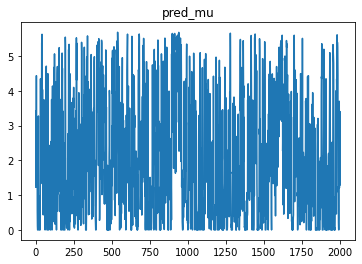

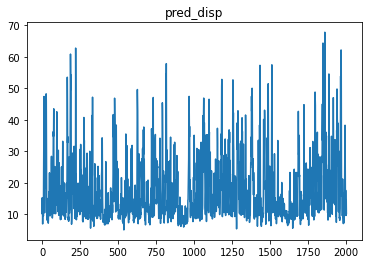

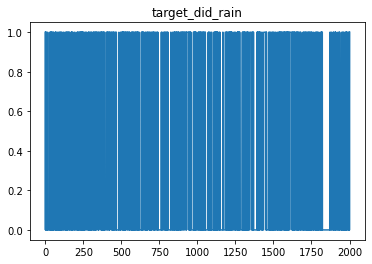

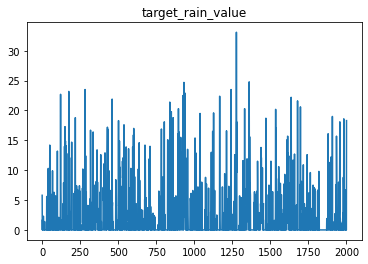

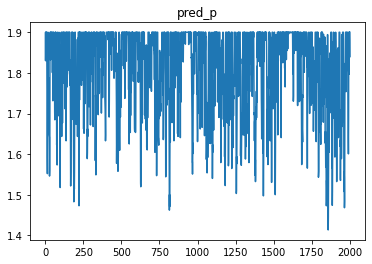

In [36]:
for k in [0,1,2,3,5]:
    plt.plot(range(2002),[CP_outputs[100][k][i][3][2]for i in range(2002)])
    plt.title(output_keys[k])
    plt.show()

In [45]:
from sklearn.metrics import roc_curve, auc
from math import exp
import numpy as np
import scipy.stats as scs
import tweedie 
#Here:
# 0 'pred_mu', 1'pred_disp', 2'target_did_rain', 3'target_rain_value', 4'date', 5'pred_p', 6'location'.
#[place][parameter][day][row][column]
#Old:
#0:i,1:location,2:pred_mu,3:pred_disp,4:pred_p,5:target_rain_value,6:dates

CP_0mm=[]
CP_0mm_cdfx=[]

for place in tqdm(CP_outputs):
    for day in range(2002):
            for row in range(4):
                for column in range(4):
                            
                    #vector of 'did it rain this much'
                    if place[3][day][row][column]>0.1:
                        CP_0mm.append(1)
                    else:
                        CP_0mm.append(0)
                    #vetor of 'probability it rained this much'
                    CP_0mm_cdfx.append(1-tweedie.tweedie(mu=place[0][day][row][column],p=place[5][day][row][column],phi=place[1][day][row][column]).cdf(0.1))

  
print('0 done')
CP_5mm=[]
CP_5mm_cdfx=[]

for place in tqdm(CP_outputs):
    for day in range(2002):
        for row in range(4):
                for column in range(4):
                                       
                    #vector of 'did it rain this much'
                    if place[3][day][row][column]>5:
                        CP_5mm.append(1)
                    else:
                        CP_5mm.append(0)
                    CP_5mm_cdfx.append(1-tweedie.tweedie(mu=place[0][day][row][column],p=place[5][day][row][column],phi=place[1][day][row][column]).cdf(5))

                    #vetor of 'probability it rained this much'
print('5 done')



CP_10mm=[]
CP_10mm_cdfx=[]

for place in tqdm(CP_outputs):
    for day in range(2002):
        for row in range(4):
                for column in range(4):
                    #vector of 'did it rain this much'
                    if place[3][day][row][column]>10:
                        CP_10mm.append(1)
                    else:
                        CP_10mm.append(0)
                    #vetor of 'probability it rained this much'
                    CP_10mm_cdfx.append(1-tweedie.tweedie(mu=place[0][day][row][column],p=place[5][day][row][column],phi=place[1][day][row][column]).cdf(10))
print('10 done')

CP_15mm=[]
CP_15mm_cdfx=[]

for place in tqdm(CP_outputs):
    for day in range(2002):
        for row in range(4):
                for column in range(4):
                    #vector of 'did it rain this much'
                    if place[3][day][row][column]>15:
                        CP_15mm.append(1)
                    else:
                        CP_15mm.append(0)
                    #vetor of 'probability it rained this much'
                    CP_15mm_cdfx.append(1-tweedie.tweedie(mu=place[0][day][row][column],p=place[5][day][row][column],phi=place[1][day][row][column]).cdf(15))
print('15 done')


CP_20mm=[]
CP_20mm_cdfx=[]

for place in tqdm(CP_outputs):
    for day in range(2002):
        for row in range(4):
                for column in range(4):
                    #vector of 'did it rain this much'
                    if place[3][day][row][column]>20:
                        CP_20mm.append(1)
                    else:
                        CP_20mm.append(0)
                    #vetor of 'probability it rained this much'
                    CP_20mm_cdfx.append(1-tweedie.tweedie(mu=place[0][day][row][column],p=place[5][day][row][column],phi=place[1][day][row][column]).cdf(20))
print('20 done')


CP_25mm=[]
CP_25mm_cdfx=[]

for place in tqdm(CP_outputs):
    for day in range(2002):
        for row in range(4):
                for column in range(4):
                    #vector of 'did it rain this much'
                    if place[3][day][row][column]>25:
                        CP_25mm.append(1)
                    else:
                        CP_25mm.append(0)
                    #vetor of 'probability it rained this much'
                    CP_25mm_cdfx.append(1-tweedie.tweedie(mu=place[0][day][row][column],p=place[5][day][row][column],phi=place[1][day][row][column]).cdf(25))
print('25 done')

100%|██████████| 267/267 [2:28:58<00:00, 33.48s/it]  


0 done


100%|██████████| 267/267 [2:39:13<00:00, 35.78s/it]  


5 done


100%|██████████| 267/267 [2:41:09<00:00, 36.21s/it]  


10 done


100%|██████████| 267/267 [2:42:18<00:00, 36.48s/it]  


15 done


100%|██████████| 267/267 [2:43:09<00:00, 36.67s/it]  


20 done


100%|██████████| 267/267 [2:53:08<00:00, 38.91s/it]  

25 done


In [47]:
import pickle

'''with open('CP_us.txt','wb') as f:
    pickle.dump(CP_us,f)'''

with open('CP_0mm.txt','wb') as f:
    pickle.dump(CP_0mm,f)

with open('CP_0mm_cdfx.txt','wb') as f:
    pickle.dump(CP_0mm_cdfx,f)

with open('CP_10mm.txt','wb') as f:
    pickle.dump(CP_10mm,f)

with open('CP_10mm_cdfx.txt','wb') as f:
    pickle.dump(CP_10mm_cdfx,f)

with open('CP_15mm.txt','wb') as f:
    pickle.dump(CP_15mm,f)

with open('CP_15mm_cdfx.txt','wb') as f:
    pickle.dump(CP_15mm_cdfx,f)

with open('CP_20mm.txt','wb') as f:
    pickle.dump(CP_20mm,f)

with open('CP_20mm_cdfx.txt','wb') as f:
    pickle.dump(CP_20mm_cdfx,f)

with open('CP_25mm.txt','wb') as f:
    pickle.dump(CP_25mm,f)

with open('CP_25mm_cdfx.txt','wb') as f:
    pickle.dump(CP_25mm_cdfx,f)


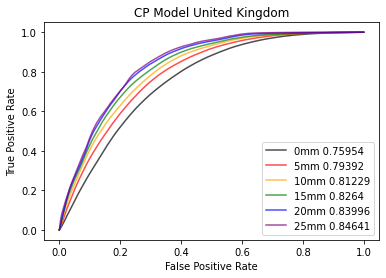

In [48]:
fpr_0mm, tpr_0mm, _ = metrics.roc_curve(CP_0mm,CP_0mm_cdfx)
auc0 = metrics.roc_auc_score(CP_0mm,CP_0mm_cdfx)
plt.plot(fpr_0mm,tpr_0mm,label='AUC='+str(auc0),color='black',alpha=0.7)

fpr_5mm, tpr_5mm, _ = metrics.roc_curve(CP_5mm,CP_5mm_cdfx)
auc5 = metrics.roc_auc_score(CP_5mm,CP_5mm_cdfx)
plt.plot(fpr_5mm,tpr_5mm,label='AUC='+str(auc5),color='red',alpha=0.7)

fpr_10mm, tpr_10mm, _ = metrics.roc_curve(CP_10mm,CP_10mm_cdfx)
auc10 = metrics.roc_auc_score(CP_10mm,CP_10mm_cdfx)
plt.plot(fpr_10mm,tpr_10mm,label='AUC='+str(auc10),color='orange',alpha=0.7)

fpr_15mm, tpr_15mm, _ = metrics.roc_curve(CP_15mm,CP_15mm_cdfx)
auc15 = metrics.roc_auc_score(CP_15mm,CP_15mm_cdfx)
plt.plot(fpr_15mm,tpr_15mm,label='AUC='+str(auc15),color='green',alpha=0.7)

fpr_20mm, tpr_20mm, _ = metrics.roc_curve(CP_20mm,CP_20mm_cdfx)
auc20 = metrics.roc_auc_score(CP_20mm,CP_20mm_cdfx)
plt.plot(fpr_20mm,tpr_20mm,label='AUC='+str(auc20),color='blue',alpha=0.7)

fpr_25mm, tpr_25mm, _ = metrics.roc_curve(CP_25mm,CP_25mm_cdfx)
auc25 = metrics.roc_auc_score(CP_25mm,CP_25mm_cdfx)
plt.plot(fpr_25mm,tpr_25mm,label='AUC='+str(auc25),color='purple',alpha=0.7)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['0mm '+str(round(auc0,5)),'5mm '+str(round(auc5,5)),'10mm '+str(round(auc10,5)),'15mm '+str(round(auc15,5)),'20mm '+str(round(auc20,5)),'25mm '+str(round(auc25,5))])
plt.title('CP Model United Kingdom')
plt.savefig('ROC CP model UK')

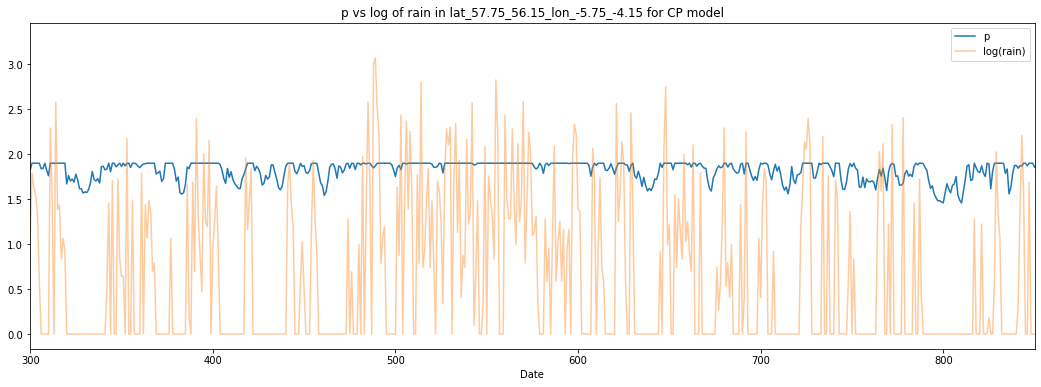

In [37]:
#p plot p
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(18, 6))
plt.plot(range(2002),[CP_outputs[1][5][i][0][0] for i in range(2002)])
plt.plot(range(2002),[0 if rain<1 else np.log(rain) for rain in [CP_outputs[1][3][i][0][0] for i in range(2002)]],'-',alpha=0.4)
plt.xlabel('Date')
plt.xlim([range(2002)[300],range(2002)[850]])
plt.legend(['p','log(rain)'],facecolor='white')
plt.title('p vs log of rain in lat_57.75_56.15_lon_-5.75_-4.15 for CP model')
plt.savefig('CP_p_UK')


In [42]:
import math 
import tweedie
cp_median = []
cp_q25 = []
cp_q75 = []
cp_q68 = []
cp_q95 = []
cp_q32 = []
cp_q05 = []

#Here:
# 0 'pred_mu', 1'pred_disp', 2'target_did_rain', 3'target_rain_value', 4'date', 5'pred_p', 6'location'.
#[place][parameter][day][row][column]
#Old:
#0:i,1:location,2:pred_mu,3:pred_disp,4:pred_p,5:target_rain_value,6:dates

for m,d,i in tqdm(zip([CP_outputs[1][0][i][0][0] for i in range(2002)],[CP_outputs[1][1][i][0][0] for i in range(2002)],range(2002))) :
    rv = tweedie.tweedie(mu=m,p=CP_outputs[1][5][i][0][0],phi=d) 
    cp_median.append(rv.ppf(0.5))
    cp_q25.append(rv.ppf(0.25))
    cp_q75.append(rv.ppf(0.75))
    cp_q95.append(rv.ppf(0.95))
    cp_q05.append(rv.ppf(0.05))


2002it [00:57, 34.97it/s]


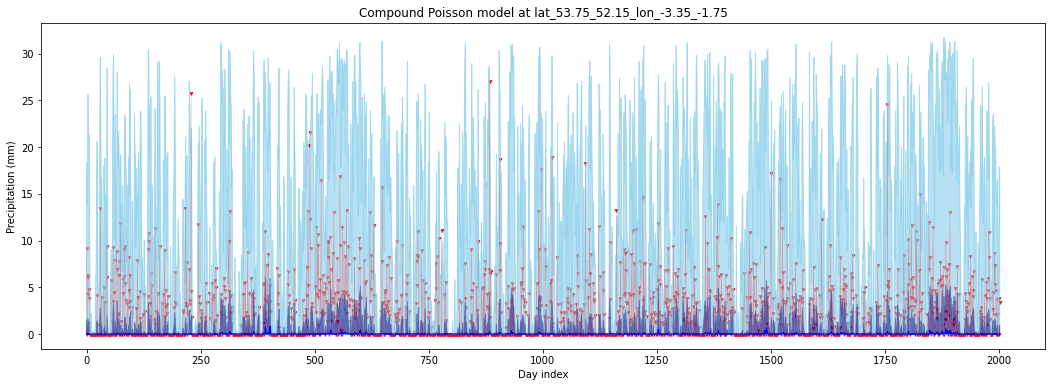

In [41]:
for q in [cp_median,cp_q25,cp_q05,cp_q75,cp_q95]:
    for i in range(len(q)):
        if math.isnan(q[i]):
            q[i]=0

plt.figure(figsize=(18, 6))
plt.scatter(range(2002),[CP_outputs[1][3][i][0][0] for i in range(2002)],color='r',marker='1',s=16)
plt.plot(range(2002),[CP_outputs[1][3][i][0][0] for i in range(2002)],color='r',alpha=0.5,linewidth=0.3)
plt.plot(range(2002),cp_q05,color='skyblue',linewidth=0.6,alpha=0.3)
plt.plot(range(2002),cp_q25,color='navy',linewidth=0.6,alpha=0.3)
plt.plot(range(2002),cp_median,color='blue',linewidth=1,alpha=1)
plt.plot(range(2002),cp_q75,color='navy',linewidth=0.6,alpha=0.3)
plt.plot(range(2002),cp_q95,color='skyblue',linewidth=0.6,alpha=0.3)
plt.fill_between(range(2002), cp_median, cp_q75, where=([cp_median[k] < cp_q75[k] for k in range(2002)]), color='navy', alpha=0.6,interpolate=True)
plt.fill_between(range(2002), cp_median, cp_q25, where=([cp_median[k] > cp_q25[k] for k in range(2002)]), color='navy', alpha=0.6,interpolate=True)
plt.fill_between(range(2002), cp_q95, cp_q75, where=([cp_q95[k] > cp_q75[k] for k in range(2002)]), color='skyblue', alpha=0.6,interpolate=True)
plt.fill_between(range(2002), cp_q05, cp_q25, where=([cp_q05[k] < cp_q25[k] for k in range(2002)]), color='skyblue', alpha=0.6,interpolate=True)
#plt.xlim([range(2002)[300],range(2002)[450]])
plt.title('Compound Poisson model at lat_53.75_52.15_lon_-3.35_-1.75')
plt.xlabel('Day index')
plt.ylabel('Precipitation (mm)')
plt.savefig('cp_quantiles_UK')

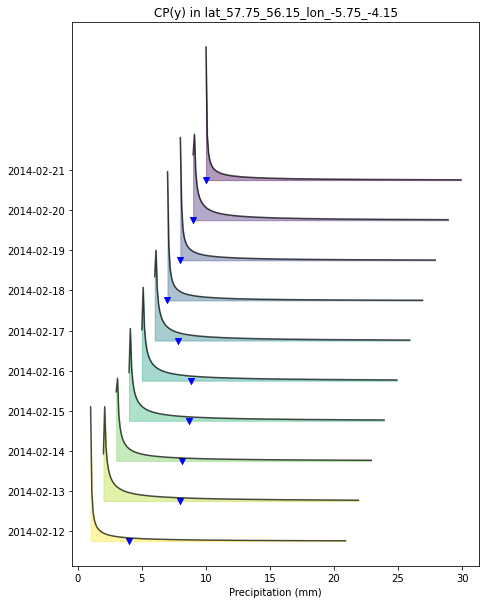

In [36]:
import matplotlib
import pandas as pd
import sklearn.preprocessing
x=[i/10 for i in range(200)]

#Here:
# 0 'pred_mu', 1'pred_disp', 2'target_did_rain', 3'target_rain_value', 4'date', 5'pred_p', 6'location'.
#[place][parameter][day][row][column]
#Old:
#0:i,1:location,2:pred_mu,3:pred_disp,4:pred_p,5:target_rain_value,6:dates


plt.figure(figsize=(7.3, 10))
colors = matplotlib.cm.viridis(np.linspace(0, 1, len(range(300,310))))
for idx,col in zip(range(309,299,-1),colors):
    rv=tweedie.tweedie(mu=[CP_outputs[1][0][i][0][0] for i in range(2002)][idx],p=[CP_outputs[1][5][i][0][0] for i in range(2002)][idx],phi=[CP_outputs[1][1][i][0][0] for i in range(2002)][idx])
    level=((idx-300)*0.2)
    plt.plot([k+idx-299 for k in x],level+rv.pdf(x),color='black',alpha=0.7)
    plt.fill_between([k+idx-299 for k in x],y1=level+rv.pdf(x),y2=level,where=([level+rv.pdf(x_)>level for x_ in x]),color=col,alpha=0.4)
    plt.scatter([CP_outputs[1][3][i][0][0] for i in range(2002)][idx]+idx-299,level,marker='v',color='b')

plt.xlabel('Precipitation (mm)')
plt.yticks([0.05+0.2*k for k in range(10)],["2014-02-12",
"2014-02-13",
"2014-02-14",
"2014-02-15",
"2014-02-16",
"2014-02-17",
"2014-02-18",
"2014-02-19",
"2014-02-20",
"2014-02-21"])
plt.title('CP(y) in lat_57.75_56.15_lon_-5.75_-4.15')
plt.savefig('CP_dists')
